In [310]:
import pandas as pd
import numpy as np
import random as r

import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [311]:
boston_data = load_boston()

### 1) Load the data into pandas DataFrame.

In [312]:
df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])

### 2) How many examples are there in the dataset?

In [313]:
df.shape[0]

506

или




In [314]:
len(df.count(axis=1))

506

### 3) What is the number of features?

In [315]:
df.shape[1]

13

или

In [316]:
len(df.count())

13

### 4) Plot each feature against ‘Median Value’ (housing price). What 3 features do you think are best suited to predict ‘Median Value’ with a linear model? Why these 3?

<IPython.core.display.Javascript object>


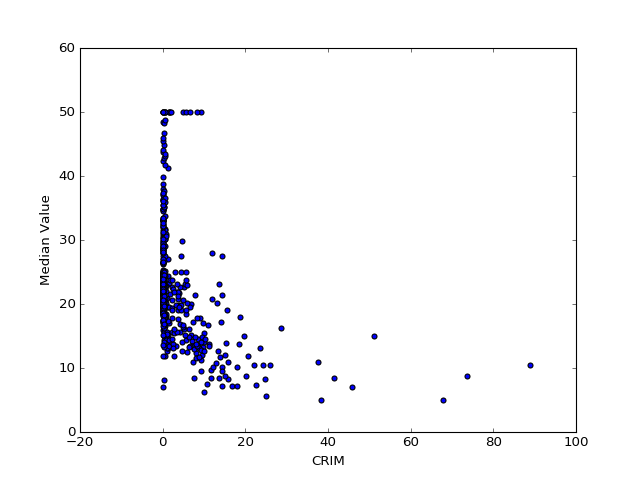

<IPython.core.display.Javascript object>


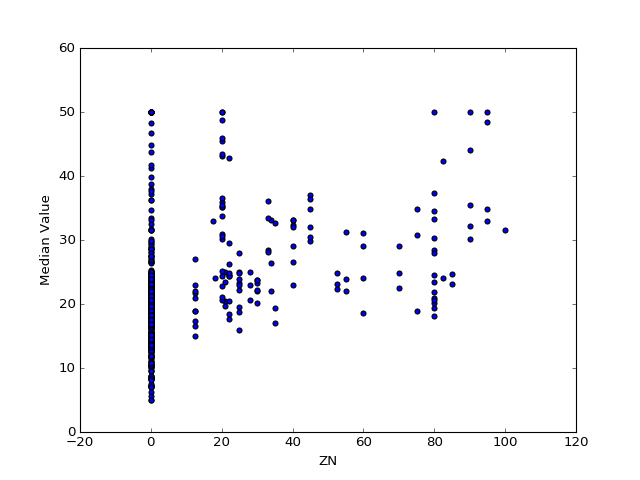

<IPython.core.display.Javascript object>


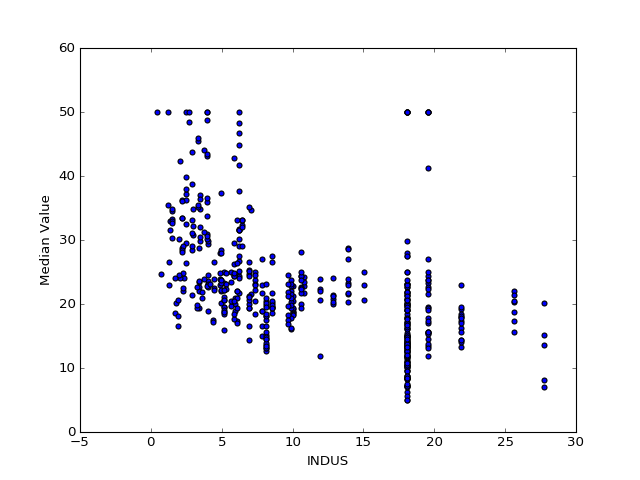

<IPython.core.display.Javascript object>


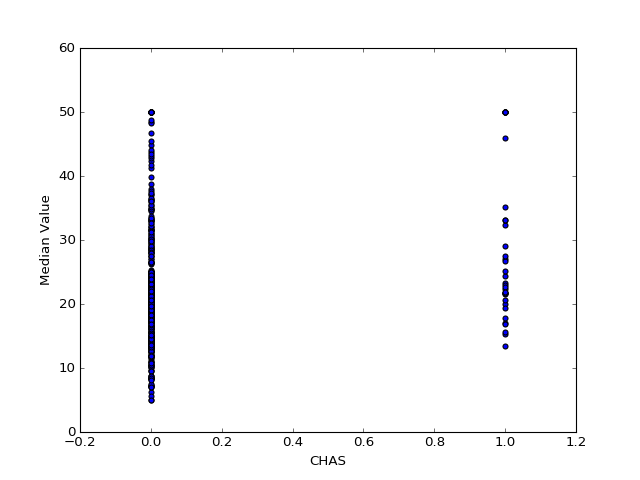

<IPython.core.display.Javascript object>


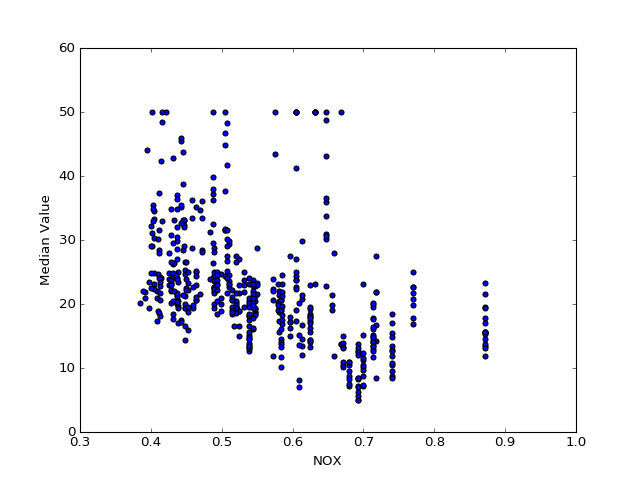

<IPython.core.display.Javascript object>


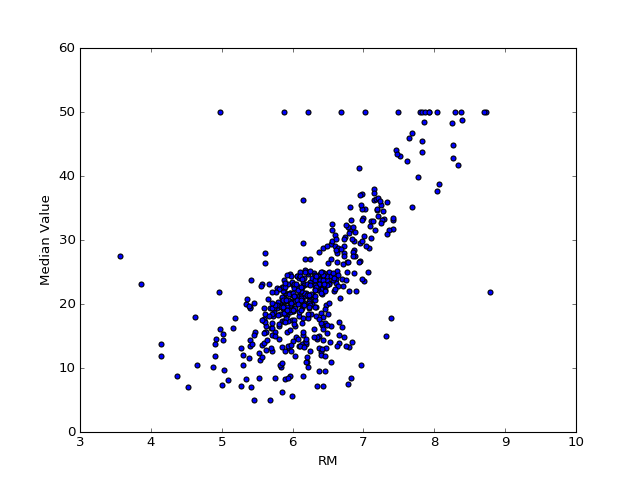

<IPython.core.display.Javascript object>


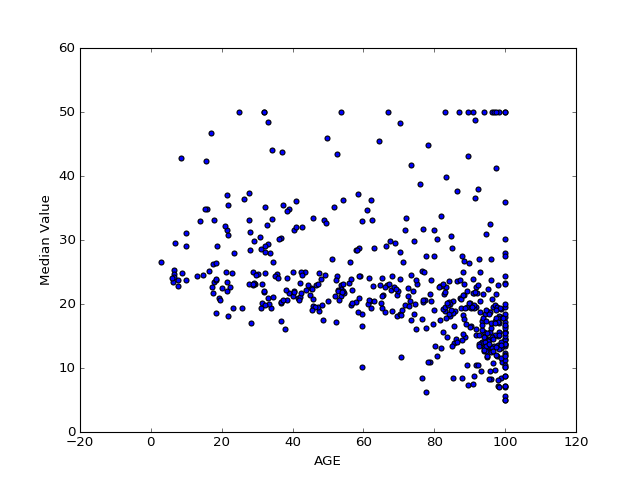

<IPython.core.display.Javascript object>


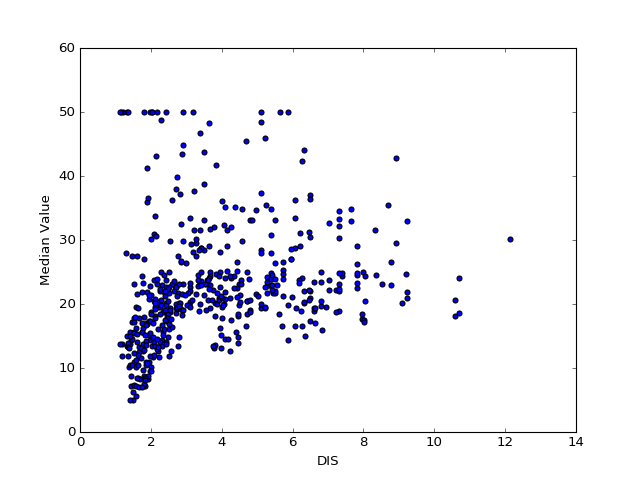

<IPython.core.display.Javascript object>


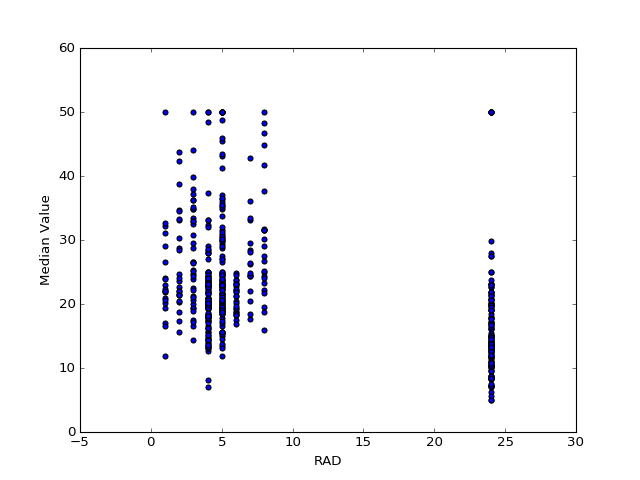

<IPython.core.display.Javascript object>


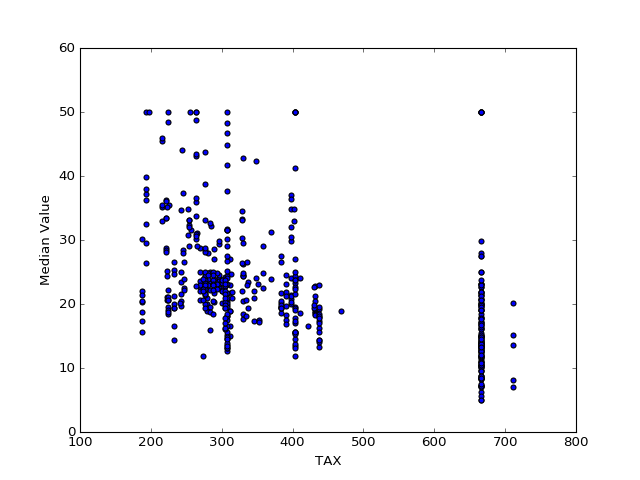

<IPython.core.display.Javascript object>


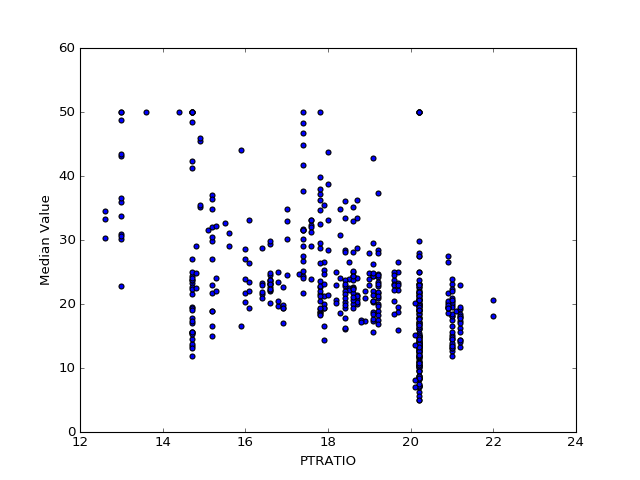

<IPython.core.display.Javascript object>


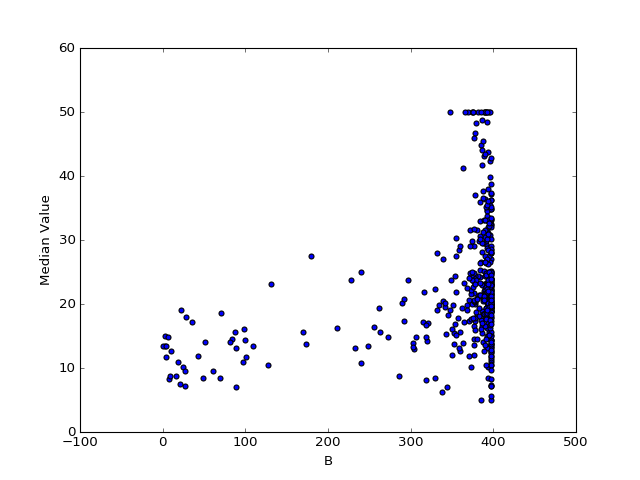

<IPython.core.display.Javascript object>


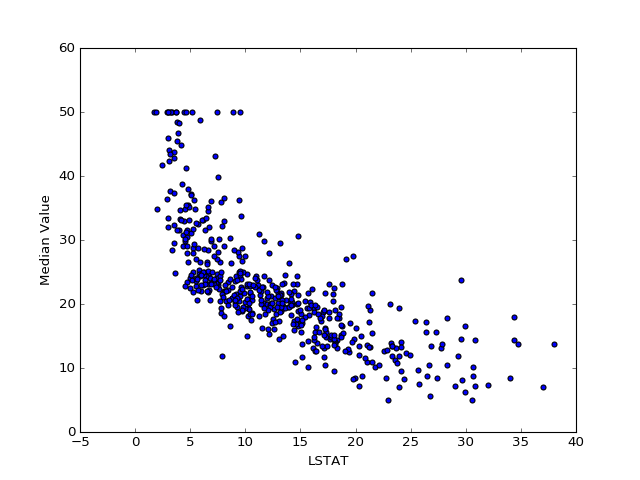

In [328]:
for feature in df:
    plt.figure()
    plt.scatter(df[feature], boston_data['target'])
    plt.xlabel(feature)
    plt.ylabel('Median Value')
    plt.show()

Во многих графиках изображены **несколько** вертикальных столбцов и поэтому они не подходят для линейной регрессии. На графике CRIM выделяется почти один столбец, и он тоже не подходит, т.к. при нулевом CRIM может быть весь диапазон Median Value. А, например, DIS больше похож на пятно, и поэтому тоже плохо подходит для линейной регресси.

Следовательно, для линейной регрессии наиболее подошли эти параметры: RM, AGE, LSTAT

### 5) What are the statistics for the chosen variables (min, max, mean, std deviation)?


In [318]:
features = ['RM', 'AGE', 'LSTAT']
props = ['min', 'max', 'mean', 'std']

df[features].describe().loc[props]

,RM,AGE,LSTAT
min,3.561000,2.900000,1.730000
max,8.780000,100.000000,37.970000
mean,6.284634,68.574901,12.653063
std,0.702617,28.148861,7.141062


### 6) Split the data into the training and testing sets with train_test_split (testing set should contain 10% of all data).


In [319]:
x1, x2, x3 = 'RM', 'AGE', 'LSTAT'

X = df[[x1, x2, x3]].values

r.seed(0)

def split(X, degree): 
    y = boston_data['target']
    feat = PolynomialFeatures(degree=degree)
    X_poly = feat.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, 1)

### 7) Apply data normalization to the training set.


In [320]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### 8) Fit the linear regression model on the training set. Report mean squared error and coefficient of determination R^2 on the training and testing sets (don’t forget to apply normalization to the testing set).


In [321]:
X_test = scaler.transform(X_test)

def lin_reg(X_train, y_train, X_test, y_test):
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    train = clf.score(X_train, y_train)
    test = clf.score(X_test, y_test)
    train_err = mean_squared_error(y_train, clf.predict(X_train))
    test_err = mean_squared_error(y_test, clf.predict(X_test))
    return train, test, train_err, test_err

# train, test, train_err, test_err = lin_reg(X_train, y_train, X_test, y_test)
res = lin_reg(X_train, y_train, X_test, y_test)

row_names = ['train', 'test','train error','test error']

pd.DataFrame(list(res), index = row_names, columns=['degree 1'])

,degree 1
train,0.635546
test,0.665599
train error,31.570652
test error,20.878059


### 9) Try to add more features, report which features you added and what influence it had on the model performance.


Добавим параметры, которые плохо подходят для линейной регрессии, и которые должны ухудшить результат. Добавлены 5 параметров: 
CHAS, NOX, RAD, TAX, ZN 

In [322]:
# bad parameters for linear regression 
b1, b2, b3, b4, b5 = 'CHAS', 'NOX', 'RAD', 'TAX', 'ZN'

In [323]:
X_bad = df[[x1, x2, x3, b1, b2, b3, b4, b5]].values

X_train_bad, X_test_bad, y_train_bad, y_test_bad = split(X_bad, 1)

scaler = StandardScaler()
X_train_bad = scaler.fit_transform(X_train_bad)
X_test_bad = scaler.transform(X_test_bad)

# train_bad, test_bad, train_err_bad, test_err_bad = lin_reg(X_train_bad, y_train_bad, X_test_bad, y_test_bad)
res = lin_reg(X_train_bad, y_train_bad, X_test_bad, y_test_bad)

pd.DataFrame(list(res), index = row_names, columns=['degree 1'])

,degree 1
train,0.661332
test,0.729086
train error,29.336940
test error,16.914288


### 10) Use 3 features you selected in the task 4 and fit regression with polynomial features with degree = 2, 5, 7. Report the model performance on the training and testing sets.


In [324]:
degree = [2, 5, 7]
cols = []
data = []

for d in degree:
    cols.append('degree ' + str(d))
    X_train, X_test, y_train, y_test = split(X, d)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # train, test, train_err, test_err = lin_reg(X_train, y_train, X_test, y_test)
    data.append(list(lin_reg(X_train, y_train, X_test, y_test)))

pd.DataFrame(np.transpose(data), columns=cols, index=row_names)

,degree 2,degree 5,degree 7
train,0.785532,0.839976,0.883604
test,0.825745,0.824327,0.743447
train error,18.578207,13.862012,10.082729
test error,10.879496,10.968027,16.017679


При большей степени полинома начинается переобучение

### 11) Do task 10 without data normalization. Report results.


In [325]:
cols = []
data = []

for d in degree:
    cols.append('degree ' + str(d))
    X_train, X_test, y_train, y_test = split(X, d)
    # train, test, train_err, test_err = lin_reg(X_train, y_train, X_test, y_test)
    data.append(list(lin_reg(X_train, y_train, X_test, y_test)))

pd.DataFrame(np.transpose(data), columns=cols, index=row_names)

,degree 2,degree 5,degree 7
train,0.785532,0.839976,0.874857
test,0.825745,0.824256,0.828510
train error,18.578207,13.862027,10.840447
test error,10.879496,10.972455,10.706861


Результат сильно отличается только при степени полинома равной 7

### 12) Make some more features from existing features (for example, transform existing features, multiply feature with another feature, use nonlinear transform (log, exp), etc.), train regression and report results.


In [326]:
X_new = X_bad 

data = []

for d in degree:

    log_reg = LogisticRegression()
    feat = PolynomialFeatures(degree=d)

    X_poly = feat.fit_transform(X_new)
   
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

    scaler = StandardScaler()
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    log_reg.fit(X_train, y_train)
    train = log_reg.score(X_train, y_train)
    test = log_reg.score(X_test, y_test)
    
    data.append(train, test, train_err, test_err)
    
pd.DataFrame(np.transpose(data), columns=cols, index=row_names)

ValueError: Unknown label type: 'continuous'